In [1]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
series = read_csv('Nasdaq.csv')
X = series[["Close"]].values
size = int(len(X) * 0.95)

In [4]:

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
mape = np.mean(np.abs(predictions -test )/np.abs(test))
print('MAPE: '+str(mape))

MAPE: 0.04079150138359009


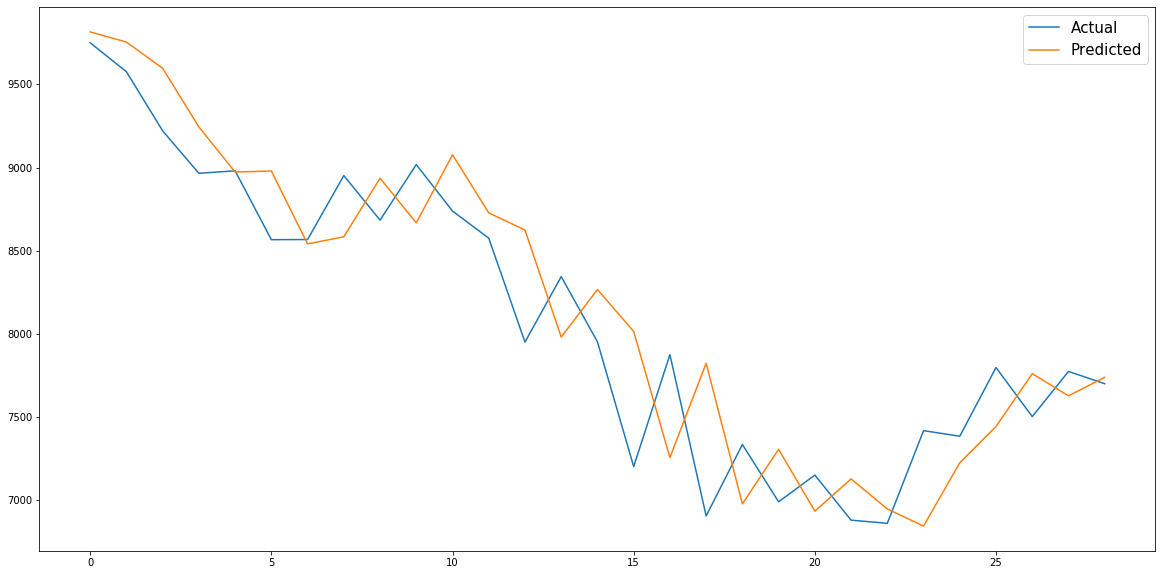

In [5]:
plt.figure(figsize=(20,10))
plt.plot(test,label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend(fontsize=15)
plt.show()

The predictions are one time step ahead of the actual values. We need to shift the actual values by 1 time step (and put the dates on the x-axis).

In [6]:
from scipy.ndimage.interpolation import shift
test=shift(test.flatten()[1:], 1, cval=np.nan)
test

array([        nan, 9576.589844, 9221.280273, 8965.610352, 8980.780273,
       8566.480469, 8567.370117, 8952.169922, 8684.089844, 9018.089844,
       8738.589844, 8575.620117, 7950.680176, 8344.25    , 7952.049805,
       7201.799805, 7874.879883, 6904.589844, 7334.779785, 6989.839844,
       7150.580078, 6879.52002 , 6860.669922, 7417.859863, 7384.299805,
       7797.540039, 7502.379883, 7774.149902])

In [7]:
predictions=np.array(predictions[1:]).reshape(1,-1)
predictions

array([[9755.28107319, 9597.4372964 , 9244.57808085, 8973.33039009,
        8979.63167395, 8541.12104607, 8583.79420764, 8936.18154876,
        8667.4588064 , 9077.09198703, 8727.6188528 , 8624.50413815,
        7980.86629681, 8266.43077613, 8014.48819455, 7256.02748383,
        7823.47706285, 6977.10209257, 7305.54361214, 6933.58313714,
        7127.58989026, 6946.89557145, 6843.79504692, 7224.71145647,
        7443.18639558, 7760.82929268, 7627.27366947, 7738.72906132]])

In [8]:
date=series[["Date"]]
train_date, test_date = date[0:size], date[size:len(X)]
test_date

,Date
536,2/20/2020
537,2/21/2020
538,2/24/2020
539,2/25/2020
540,2/26/2020
541,2/27/2020
542,2/28/2020
543,3/2/2020
544,3/3/2020
545,3/4/2020


In [9]:
index=pd.DataFrame(np.arange(536,565)).rename(columns={0:"index"})
test=pd.DataFrame(test).rename(columns={0:"Close"})
test=pd.concat([index,test],axis=1)
test

,index,Close
0,536,NaN
1,537,9576.589844
2,538,9221.280273
3,539,8965.610352
4,540,8980.780273
5,541,8566.480469
6,542,8567.370117
7,543,8952.169922
8,544,8684.089844
9,545,9018.089844


In [10]:
test=test.set_index("index")
test=pd.concat([test_date,test],axis=1)
test

,Date,Close
536,2/20/2020,NaN
537,2/21/2020,9576.589844
538,2/24/2020,9221.280273
539,2/25/2020,8965.610352
540,2/26/2020,8980.780273
541,2/27/2020,8566.480469
542,2/28/2020,8567.370117
543,3/2/2020,8952.169922
544,3/3/2020,8684.089844
545,3/4/2020,9018.089844


In [11]:
predictions=pd.DataFrame(predictions)
predictions

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,9755.281073,9597.437296,9244.578081,8973.33039,8979.631674,8541.121046,8583.794208,8936.181549,8667.458806,9077.091987,...,7305.543612,6933.583137,7127.58989,6946.895571,6843.795047,7224.711456,7443.186396,7760.829293,7627.273669,7738.729061


In [12]:
predictions=predictions.T
predictions

,0
0,9755.281073
1,9597.437296
2,9244.578081
3,8973.330390
4,8979.631674
5,8541.121046
6,8583.794208
7,8936.181549
8,8667.458806
9,9077.091987


In [13]:
predictions=predictions.rename(columns={0:"Predicted close"})
predictions

,Predicted close
0,9755.281073
1,9597.437296
2,9244.578081
3,8973.330390
4,8979.631674
5,8541.121046
6,8583.794208
7,8936.181549
8,8667.458806
9,9077.091987


In [14]:
predictions=pd.concat([index,predictions],axis=1)
predictions=predictions.set_index("index")
predictions=pd.concat([test_date,predictions],axis=1)
predictions

,Date,Predicted close
536,2/20/2020,9755.281073
537,2/21/2020,9597.437296
538,2/24/2020,9244.578081
539,2/25/2020,8973.330390
540,2/26/2020,8979.631674
541,2/27/2020,8541.121046
542,2/28/2020,8583.794208
543,3/2/2020,8936.181549
544,3/3/2020,8667.458806
545,3/4/2020,9077.091987


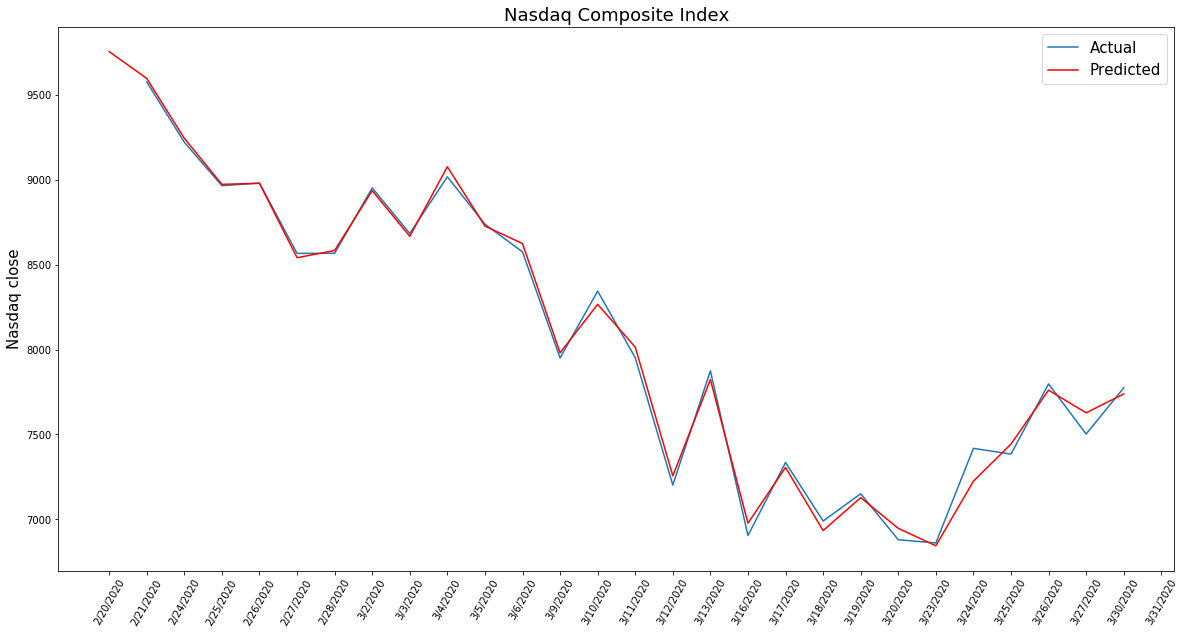

In [17]:
plt.figure(figsize=(20,10))
plt.plot(test["Date"],test["Close"],label="Actual")
plt.plot(predictions["Date"],predictions["Predicted close"], color='red',label="Predicted")
plt.title('Nasdaq Composite Index',fontsize=18)
plt.ylabel('Nasdaq close',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=60)
plt.show()

**The rolling ARIMA almost totally predicted the stock market crash in March this year.** There is a small degree of difference between Nasdaq's actual closings, but the model absolutely predicted the crash.

Let's see what Nasdaq will close at tomorrow, 9/16/2020.

In [33]:
series = read_csv('Nasdaq(extended).csv')
X = series[["Close"]].values
size = int(len(X) * 0.95)

In [34]:
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
mape = np.mean(np.abs(predictions -test )/np.abs(test))
print('MAPE: '+str(mape))

MAPE: 0.014051023683052643


In [35]:
fc,se,conf=model_fit.forecast(len(test)+2,alpha=0.01)

In [36]:
fc=pd.DataFrame(fc).rename(columns={0:"Predicted close"})
fc

,Predicted close
0,10942.677665
1,11040.861552
2,11009.890831
3,11020.977532
4,11050.268723
5,11039.943924
6,11066.701977
7,11067.924403
8,11080.791905
9,11092.474460


In [37]:
date=series[["Date"]]
train_date, test_date = date[0:size], date[size:len(X)]
test_date

,Date
408,8/14/2020
409,8/17/2020
410,8/18/2020
411,8/19/2020
412,8/20/2020
413,8/21/2020
414,8/24/2020
415,8/25/2020
416,8/26/2020
417,8/27/2020


In [38]:
import datetime

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += datetime.timedelta(days=1)
    return days

workdays=workdays(datetime.datetime(2020, 8, 14),
               datetime.datetime(2020, 9,16 ))
workdays=pd.DataFrame(workdays).rename(columns={0:"Date"})

In [39]:
se=pd.DataFrame(conf).rename(columns={0:"lower bound",1:"upper bound"})
fc=pd.DataFrame(fc).rename(columns={0:"Predicted close"})
pd.concat([workdays,fc,se],axis=1)

,Date,Predicted close,lower bound,upper bound
0,2020-08-14,10942.677665,10581.104173,11304.251156
1,2020-08-17,11040.861552,10590.782086,11490.941018
2,2020-08-18,11009.890831,10441.442315,11578.339348
3,2020-08-19,11020.977532,10360.472591,11681.482473
4,2020-08-20,11050.268723,10313.336463,11787.200983
5,2020-08-21,11039.943924,10218.569395,11861.318453
6,2020-08-24,11066.701977,10177.443241,11955.960713
7,2020-08-25,11067.924403,10109.547413,12026.301393
8,2020-08-26,11080.791905,10059.878787,12101.705022
9,2020-08-27,11092.474460,10012.631388,12172.317533


**The model predicts that Nasdaq will close at around 11235.121656 for 9/16/2020.**